# Warranty Claims Fraud Prediction

![](https://www.genre.com/content/dam/generalreinsuranceprogram/images/hero-publications/key-takeaways-from-our-us-claims-fraud-survey-en-pubhero.jpg/_jcr_content/renditions/cq5dam.crop.610.610.jpeg)

In [1]:
#Importing the libraries
#for data manipulation and analysis
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#notbook layout setting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Phase 1: Business Task
The objective of this project is to analyze warranty claims by region, product type, claim value, and other key features to predict their authenticity. 

### Data Dictionary
The dataset, sourced from Kaggle

| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|



## Phase 2: Understanding the dataset

In [2]:
#Loading the dataset
data = pd.read_csv('formatted_data.csv')

In [3]:
# checking the shape of the dataset
data.shape

(358, 21)

In [4]:
data.head(2)

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0


In [5]:
data.tail(2)

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
356,11685,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,1,1,1,0,0,0,50000.0,13,12,Manufacturer,1.5,Claim,1
357,11797,South,Andhra Pradesh,Urban,Vijayawada,Personal,Household,AC,2,2,2,0,0,0,0.0,15,303,Internet,7.0,Complaint,0


In [6]:
#checking for data type, column name and non-null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   Region            358 non-null    object 
 2   State             358 non-null    object 
 3   Area              358 non-null    object 
 4   City              358 non-null    object 
 5   Consumer_profile  358 non-null    object 
 6   Product_category  358 non-null    object 
 7   Product_type      358 non-null    object 
 8   AC_1001_Issue     358 non-null    int64  
 9   AC_1002_Issue     358 non-null    int64  
 10  AC_1003_Issue     358 non-null    int64  
 11  TV_2001_Issue     358 non-null    int64  
 12  TV_2002_Issue     358 non-null    int64  
 13  TV_2003_Issue     358 non-null    int64  
 14  Claim_Value       358 non-null    float64
 15  Service_Centre    358 non-null    int64  
 16  Product_Age       358 non-null    int64  
 1

In [7]:
#Checking the unique count in each column
data.nunique()

Unnamed: 0          358
Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

* Overview of the dataset shows that there are 358 rows and 21 columns.
* There are no null values.
* The Unnamed column is irrelevant to the business objective and needs to be dropped.
* The observations in the product issue columns need to be renamed for easy understanding.

## Phase 3: Data Preprocessing - 1

In [8]:
# #Dropping redundant column 
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
#checking for null values
data.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [10]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [11]:
# renaming the values in product issue columns
data['AC_1001_Issue'] = data['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
data['AC_1002_Issue'] = data['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
data['AC_1003_Issue'] = data['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
data['TV_2001_Issue'] = data['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
data['TV_2002_Issue'] = data['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
data['TV_2003_Issue'] = data['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

In [12]:
#describe statistics
data.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


The customers' average claim value is 11994.5 INR with an average call duration of 11.9 Minutes

Claim_Value
Skew : 1.94


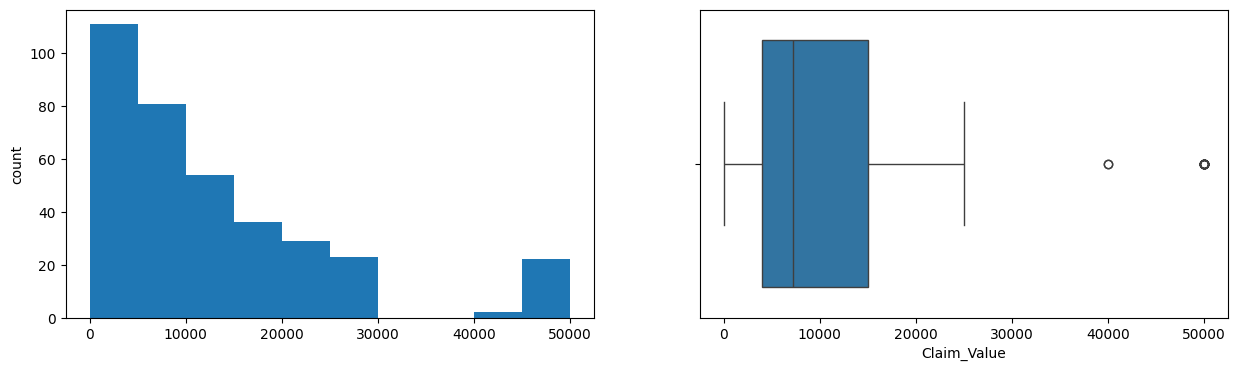

Service_Centre
Skew : -0.24


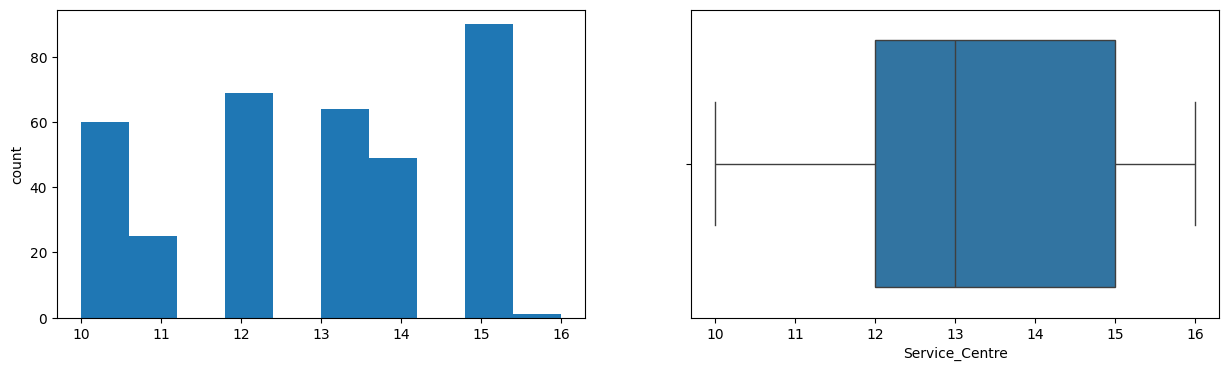

Product_Age
Skew : 1.49


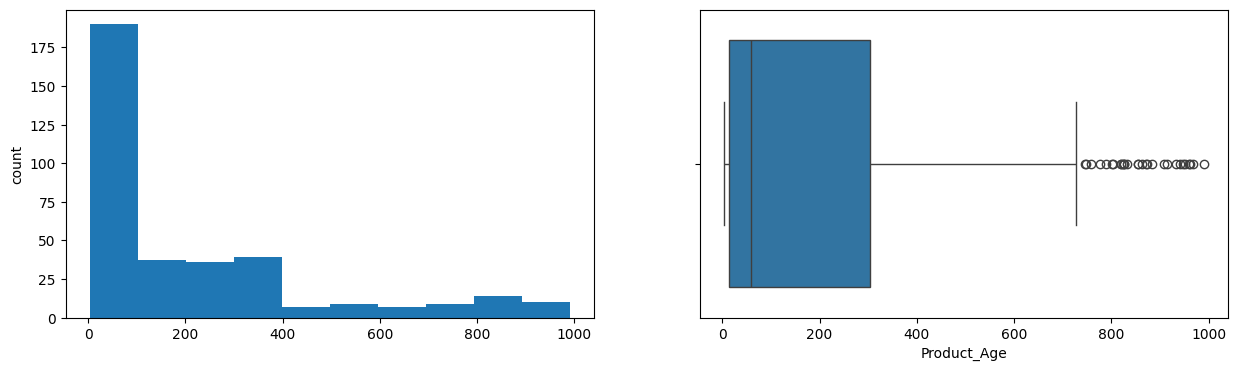

Call_details
Skew : 0.59


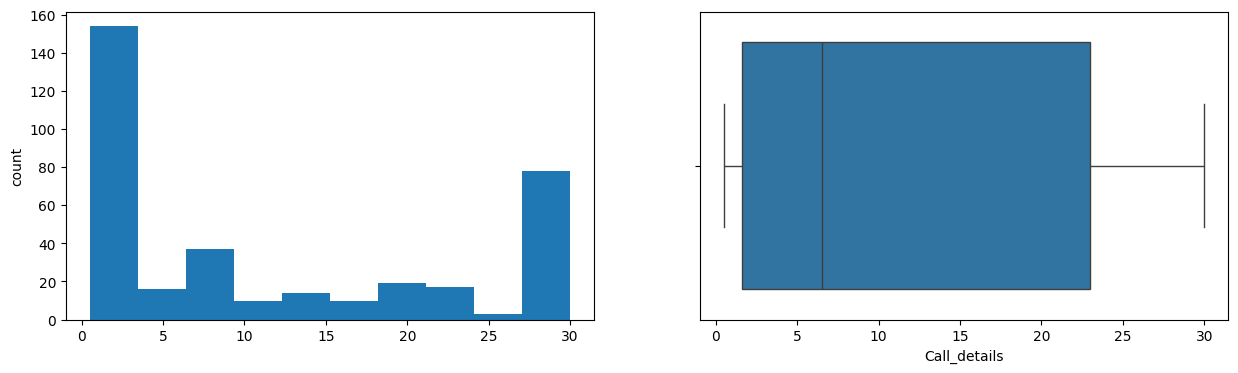

Fraud
Skew : 2.72


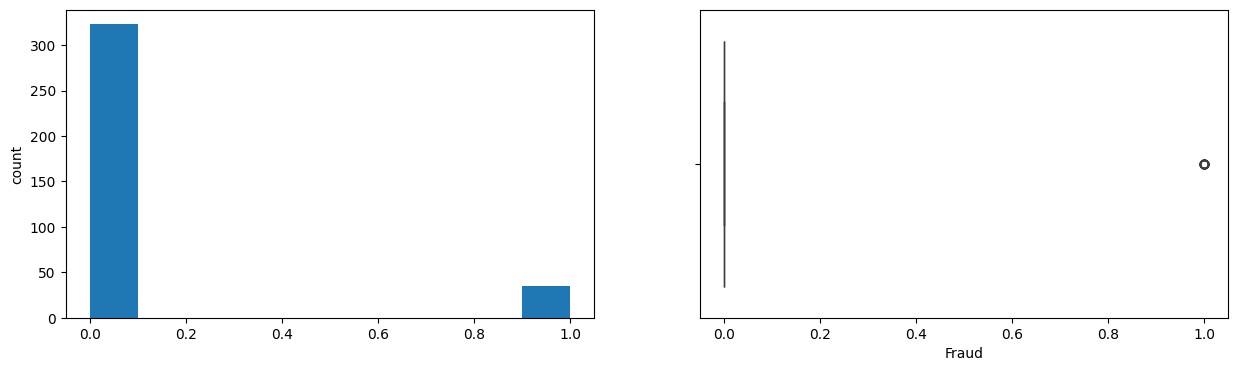

In [13]:
#checking for outliers
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show() 

The histogram and box plot indicate that the variables are skewed with some having outliers. The outliers represent real and important data points and removing them will eliminate insight into claims with higher amounts and products with high age.

## Phase 4: Exploratory Analysis
Here, I will look at the relationship between the independent variables and the target variable  to get a better
understanding and to see if there are any anomalies, trends or patterns in the data. 

### Location based Distribution of Fraudulent Claims

[Text(0.5, 1.0, 'Area Distribution of Fraudulent Claims')]

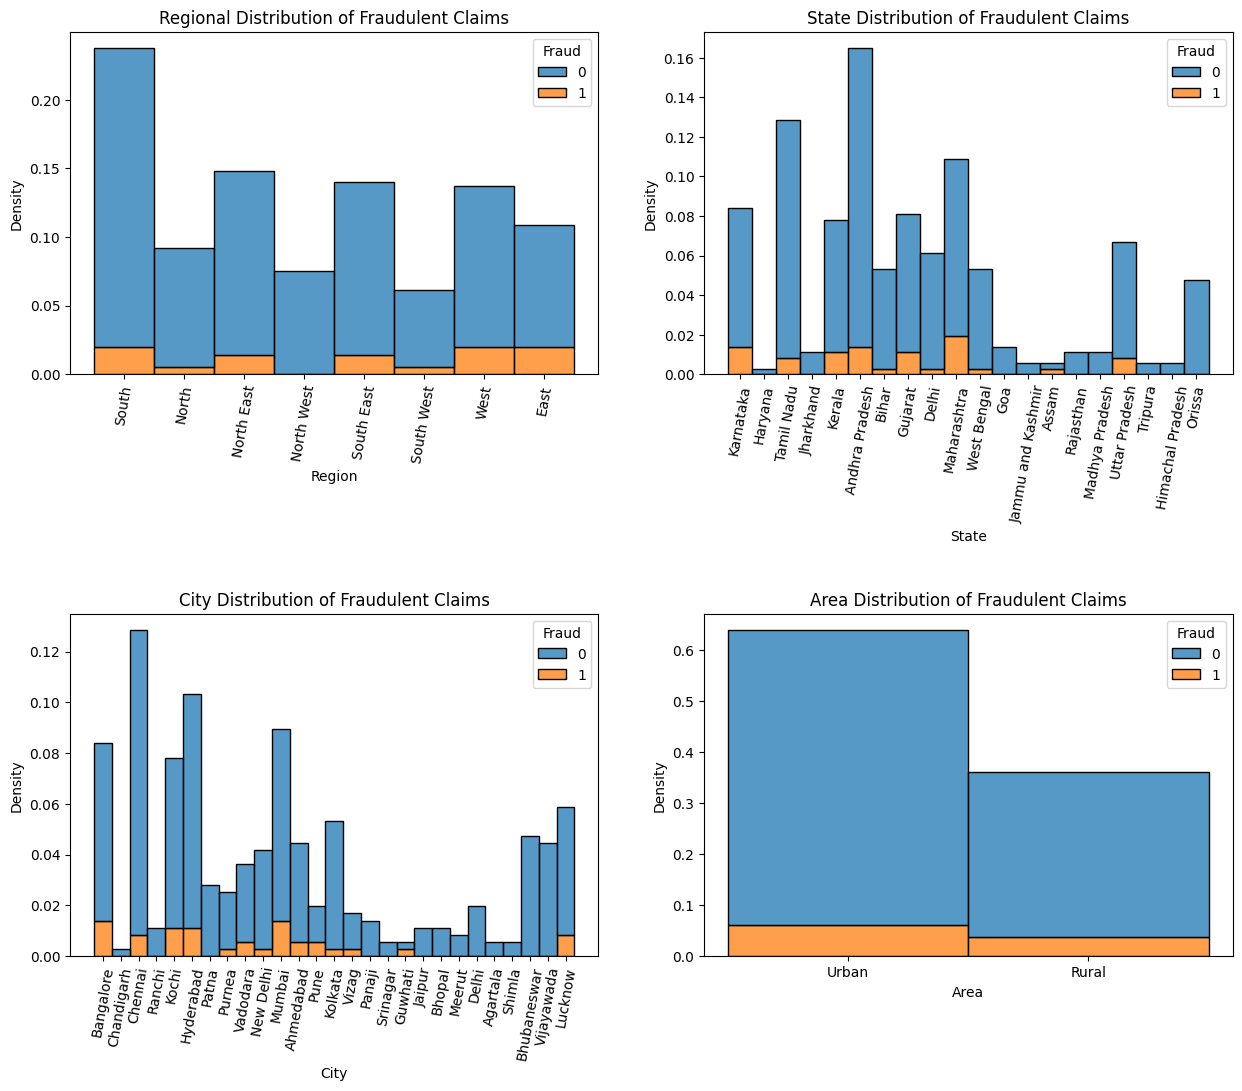

In [14]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
fig.subplots_adjust(hspace=0.7)
#Regional Distribution
sns.histplot(x = 'Region', data = data, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=80)
#State Distribution
sns.histplot(x = 'State', data = data, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='State Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=80)
#City Distribution
sns.histplot(x = 'City', data = data, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='City Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=80)
#Area Distribution
sns.histplot(x = 'Area', data = data, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Area Distribution of Fraudulent Claims')


The plots above illustrate the distribution of fraudulent claims by location. The first graph shows that regions such as South, North East, South East and West have the highest number of warranty claims. However, West, East, and South are the regions with the highest incidence of fraudulent claims. Notably, the North West region has zero fraudulent claims. 

The second graph displays the distribution of fraudulent claims by state. Andhra Pradesh, Maharashtra, Tamil Nadu, Karnataka, and Gujarat have the highest number of warranty claims, while Haryana has the fewest. Similarly, these states also account for the highest number of fraudulent claims, whereas states like Bihar, Delhi, West Bengal, and Assam have the lowest number of fraudulent claims.

The third graph illustrates the distribution of fraudulent claims by city. Chennai, Hyderabad, Bangalore, Mumbai, and Kochi have the highest number of claims, while cities like Chandigarh, Srinagar, Agartala, and Shimla have the fewest. Additionally, Chennai, Hyderabad, Bangalore, Mumbai, and Kochi also report the highest number of fraudulent claims, whereas cities such as Chandigarh, Panaji, Meerut, Jaipur, and several others have zero fraudulent claims.

The fourth graph visualizes fraudulent claims by area, showing that urban regions have a higher number of claims, and consequently, more fraudulent claims compared to rural areas.

### Consumer Profile and Fraudulent Claims

Text(0.5, 1.0, 'Consumer Profile Vs Fraud distribution ')

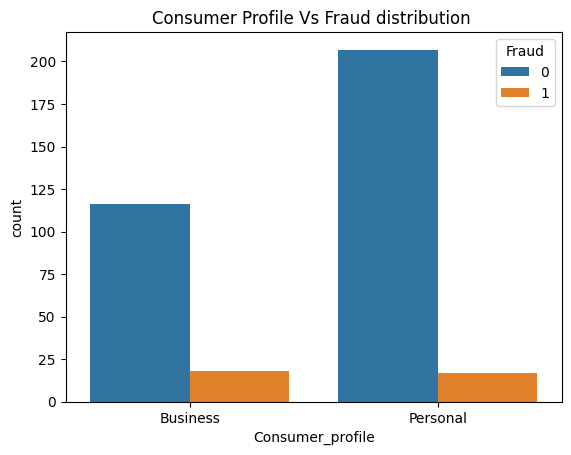

In [15]:
sns.countplot(x = 'Consumer_profile', data = data, hue = 'Fraud').set_title('Consumer Profile Vs Fraud distribution ')

This graph reveals that the majority of claims come from consumers who purchased products for personal use. However, consumers who bought products for business purposes exhibit a higher incidence of fraudulent warranty claims.

### Product and Fraudulent Claims

Text(0.5, 1.0, 'Product Vs Fraud Distribution')

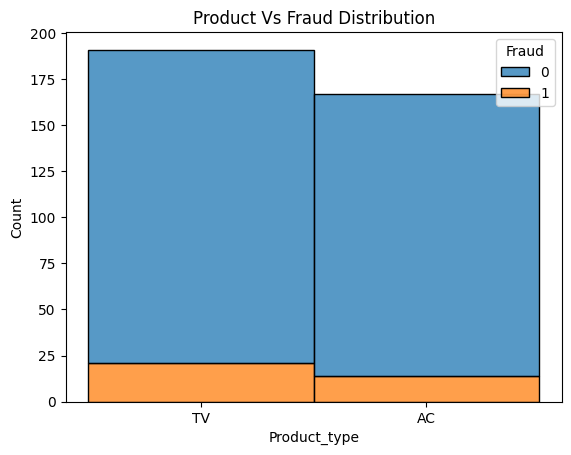

In [16]:
sns.histplot(x = 'Product_type', data = data, hue = 'Fraud', multiple='stack').set_title('Product Vs Fraud Distribution')

The graph indicates that there are more warranty claims for TVs than ACs, this could mean TV have higher sales. Additionally, the number of fraudulent claims for TVs is also greater compared to ACs.

### Product Issue and Fraudulent Claims

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

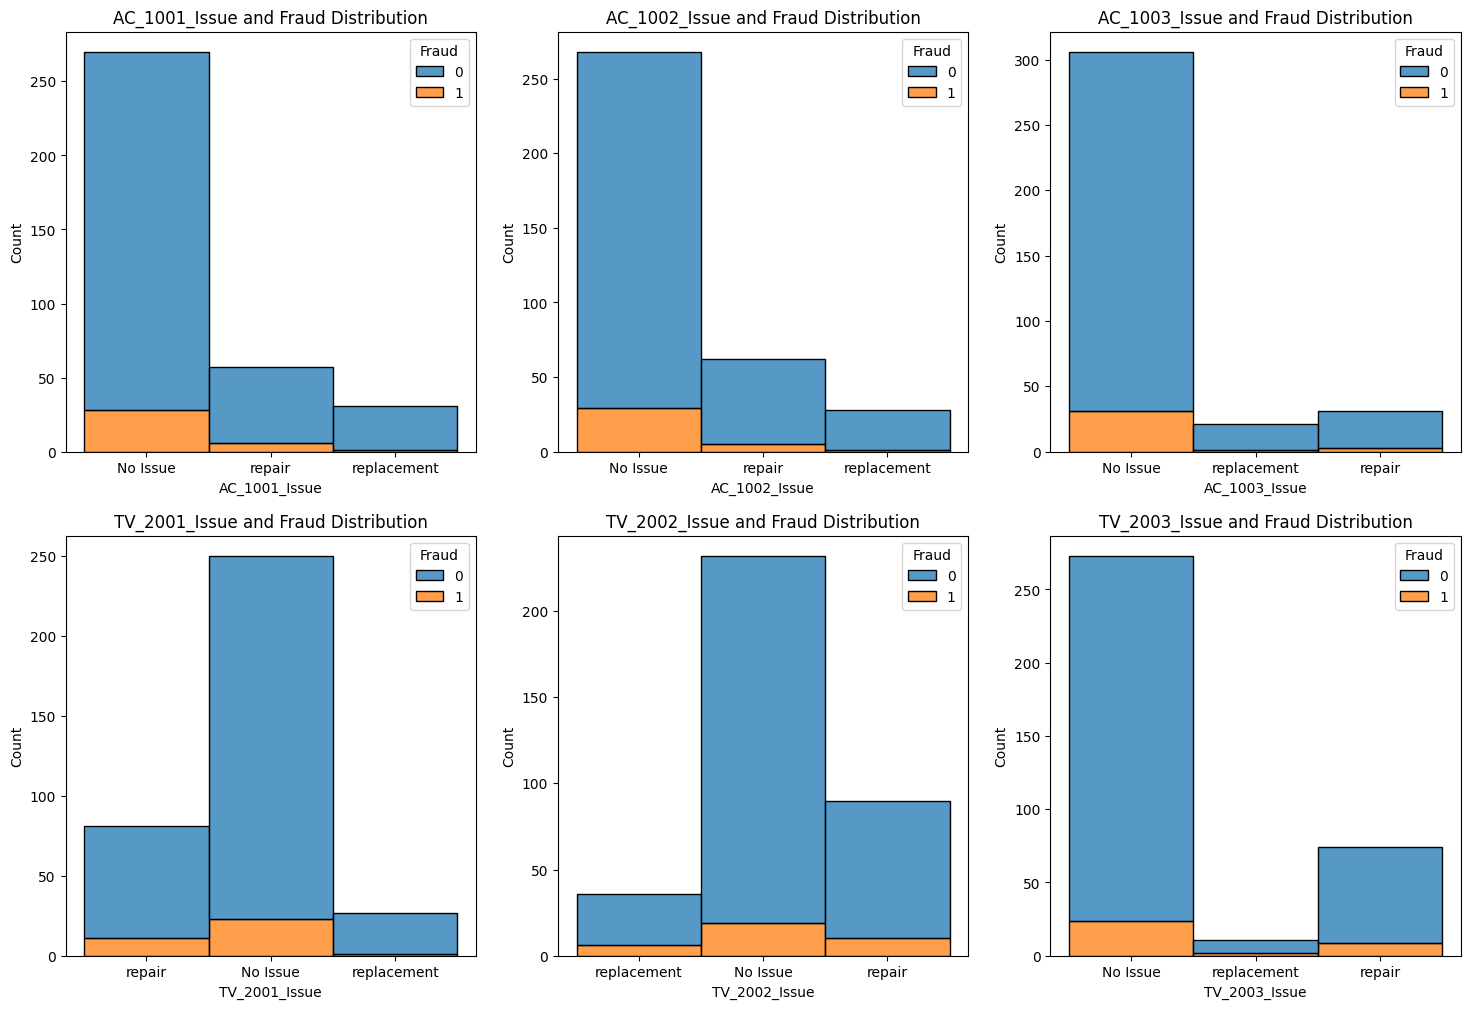

In [17]:
fig, ax = plt.subplots(2,3,figsize=(18,12))
#AC_1001_Issue Distribution and fraud
sns.histplot(x = 'AC_1001_Issue', data = data, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')
#AC_1002_Issue Distribution and fraud
sns.histplot(x = 'AC_1002_Issue', data = data, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')
#AC_1003_Issue Distribution and fraud
sns.histplot(x = 'AC_1003_Issue', data = data, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')
#TV_2001_Issue Distribution and fraud
sns.histplot(x = 'TV_2001_Issue', data = data, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')
#TV_2002_Issue Distribution and fraud
sns.histplot(x = 'TV_2002_Issue', data = data, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')
#TV_2003_Issue Distribution and fraud
sns.histplot(x = 'TV_2003_Issue', data = data, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

The above graphs highlight issues with product parts and fraudulent warranty claims on them. 

For the AC product, parts AC_1001 and AC_1002 have a higher number of repairs, while AC_1003 shows significantly fewer instances of repair or replacement. The company should prioritize improving parts AC_1001 and AC_1002. Additionally, fraudulent claims typically occur when there's no actual issue with the product across all three parts.

In the TV product, parts TV_2001 and TV_2002 exhibit more repairs, while TV_1003 has fewer repair instances and almost no replacements. Unlike AC, fraudulent claims here occur both when there are genuine issues with the product and when parts, particularly TV_2001 and TV_2002, require repair or replacement. To reduce fraudulent claims, the company should focus on enhancing parts TV_2001 and TV_2002.

### Service Center and Fraudulent Claims

Text(0.5, 1.0, 'Service Centre Vs Fraudulent Claims')

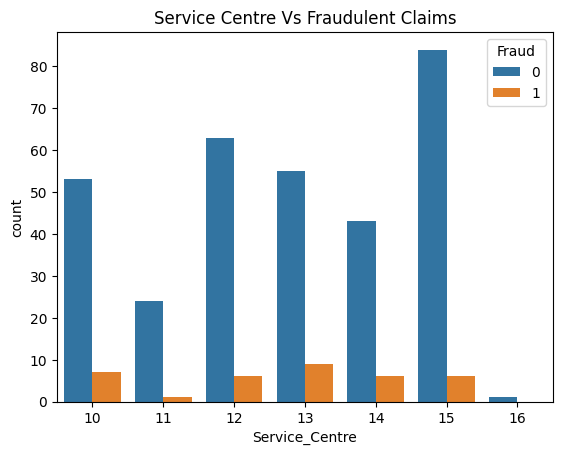

In [18]:
sns.countplot(x = 'Service_Centre', data = data, hue = 'Fraud').set_title('Service Centre Vs Fraudulent Claims')

This graph illustrates the relationship between service centers and fraudulent warranty claims. The majority of repairs and replacements are handled by service centers 15, 12, and 13. Among these, service center 13 has the highest number of fraudulent claims, followed by service center 10. Therefore, the company should closely monitor service centers 13 and 10.

### Claim Value and Fraudulent Claims

Text(0.5, 1.0, 'Claim Value and Fraudulent Claims')

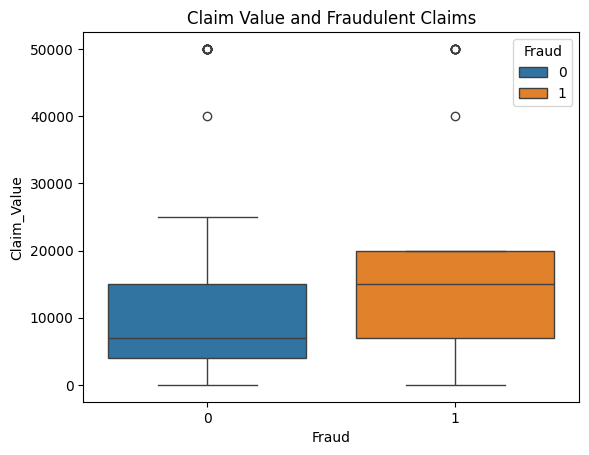

In [19]:
sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = data, hue='Fraud').set_title('Claim Value and Fraudulent Claims')

As expected, the boxplot shows that the claim value for fraudulent claims tends to be higher than for genuine claims. The median claim value for fraudulent claims is significantly greater than that of genuine claims. Additionally, the boxplot reveals that fraudulent claims are more widely distributed at higher claim values compared to genuine claims.

### Product Age and Fraudulent Claims

Text(0.5, 1.0, 'Product Age(in days) Vs Fraud Distribution')

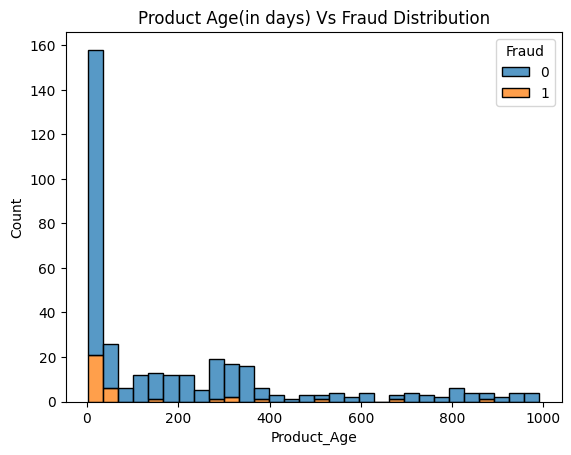

In [20]:
sns.histplot(x = 'Product_Age', data = data, hue = 'Fraud', multiple='stack', bins = 30).set_title('Product Age(in days) Vs Fraud Distribution')

The histogram shows that the majority of warranty claims occur within 70 days of purchase. However, fraudulent claims are more frequent and typically occur within the first 35 days of purchase.

### Purchase source and Fraudulent Claims

Text(0.5, 1.0, 'Purchased from Vs Fraudulent Claims')

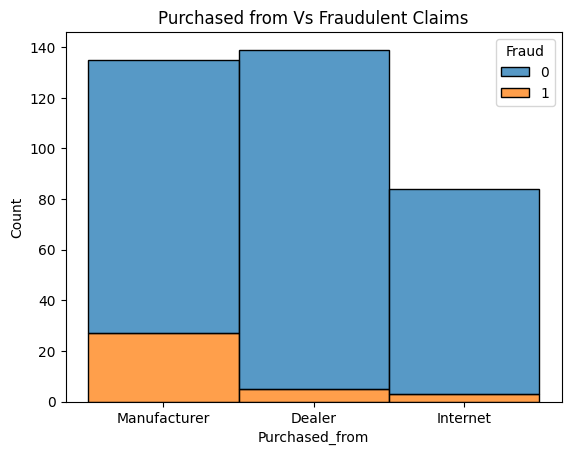

In [21]:
sns.histplot(x = 'Purchased_from', data = data, hue = 'Fraud', multiple='stack').set_title('Purchased from Vs Fraudulent Claims')

Products purchased through dealers have the highest number of warranty claims, while purchases through manufacturers account for the majority of fraudulent claims. In contrast, internet purchases have the lowest rate of fraudulent claims. The significant volume of fraudulent claims from manufacturer purchases is a concern for the company and requires attention.

### Call Duration and Fraudulent Claims

Text(0.5, 0, 'Call Duration(in mins)')

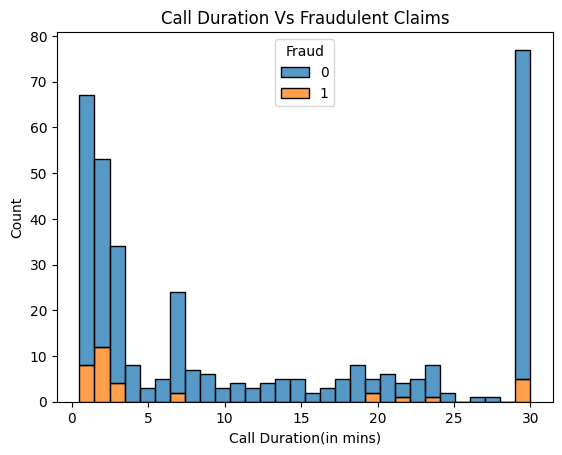

In [22]:
sns.histplot(x = 'Call_details', data = data, hue = 'Fraud', multiple='stack', bins = 30).set_title('Call Duration Vs Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')

This histogram shows the relationship between customer care call duration and fraudulent claims. The duration of customer care calls is plotted in the histogram along with the authenticity of the claims. The graph shows that fraudulent claims are more frequent when the call duration is less than or up to 3 minutes. However, genuine claims are more frequent when the call duration is more than 3 minutes. There is also a concern when the call duration takes too long up to 30 minutes

### Purpose of contact and Fraudulent Claims

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

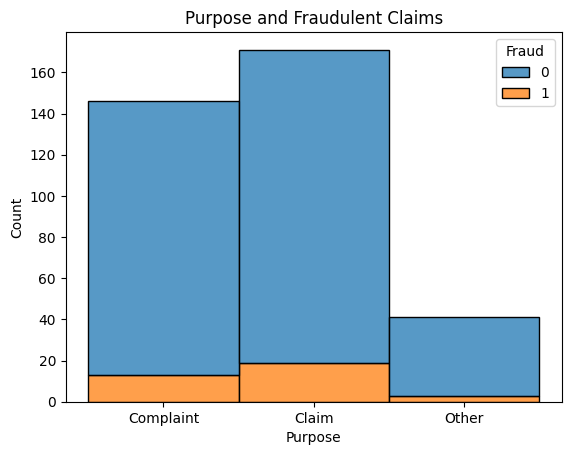

In [23]:
sns.histplot(x = 'Purpose', data = data, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')

Most of the customer contact the customer care for the purpose of complaint and claim and very few for other reasons. The Frequency of the call purpose is directly proportional to fraudulent claims. That is, fraudulent claims are more frequent when the customer contacts the customer care for the purpose of complaint and claim.

## Phase 3: Data Preprocessing - ii

##### Encoding categorical variables into numerical

In [24]:
from sklearn.preprocessing import LabelEncoder
#colums for label encoding
cols = data.columns[data.dtypes == 'object']
#Label encoder object
le = LabelEncoder()
#Label encoding the columns
for i in cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])
    print(i, data[i].unique(), '\n')

Region [4 1 2 3 5 6 7 0] 

State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14] 

Area [1 0] 

City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13] 

Consumer_profile [0 1] 

Product_category [0 1] 

Product_type [1 0] 

AC_1001_Issue [0 1 2] 

AC_1002_Issue [0 1 2] 

AC_1003_Issue [0 2 1] 

TV_2001_Issue [1 0 2] 

TV_2002_Issue [2 0 1] 

TV_2003_Issue [0 2 1] 

Purchased_from [2 0 1] 

Purpose [1 0 2] 



##### Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
#Standardizing the data
sc = StandardScaler()
data[['Claim_Value', 'Product_Age']] = sc.fit_transform(data[['Claim_Value', 'Product_Age']])

#### Correlation Matrix Heatmap

<Axes: >

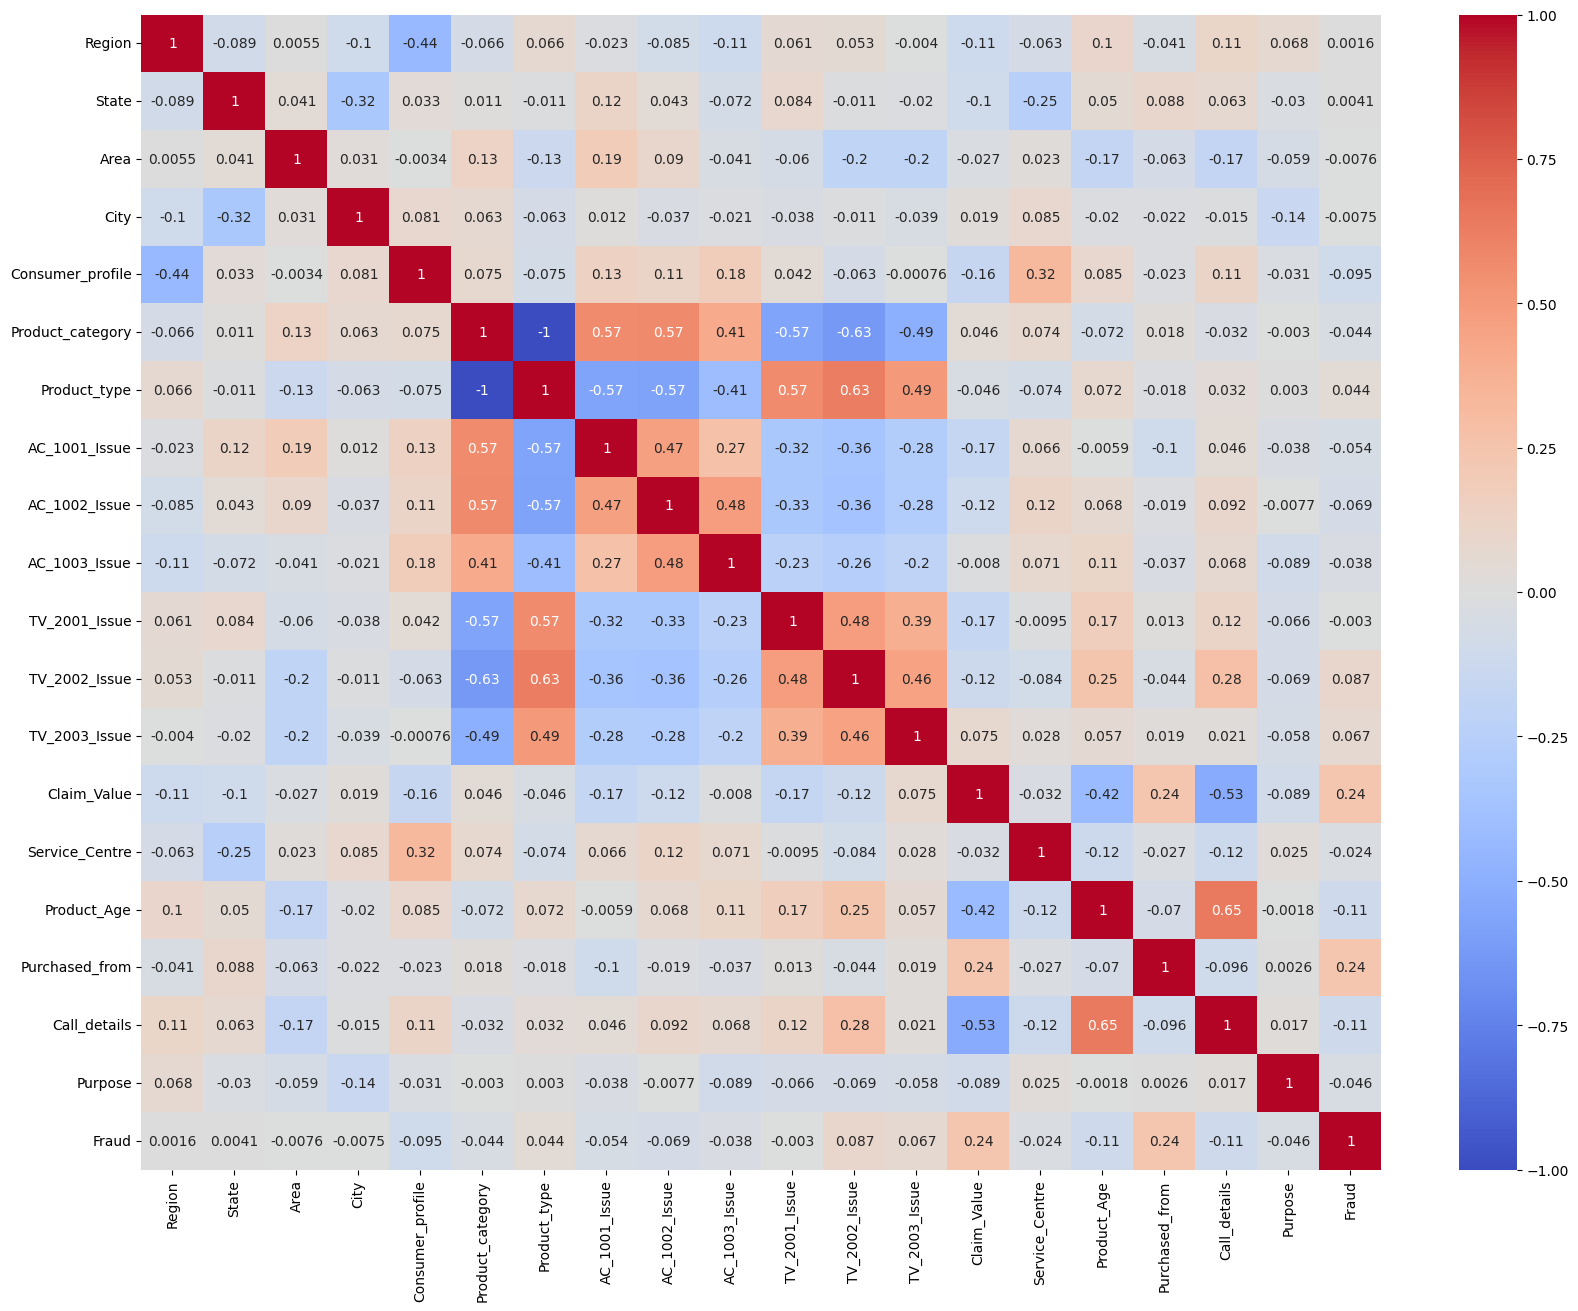

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

## Phase 5: Developing a Model

I will be using the following models
1. Logistic Regressor
2. Decision Tree Classifier
3. Random Forest Classifier
   

##### Let's start by splitting our data into a training set and test set 

##### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='Fraud')
y = data['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

##### Applying SMOTE to balance the class

In [30]:
data['Fraud'].value_counts()

Fraud
0    323
1     35
Name: count, dtype: int64

We can see that class 0 has huge difference to class 1, we need to balance this in other to achieve a better model

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [32]:
X=X_resampled
y=y_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Training a Logistic Model

In [33]:
from sklearn.linear_model import LogisticRegression
#Logistic Regressor Object
logreg = LogisticRegression()

##### Hyperparameter Tuning using GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','lbfgs'],
    'max_iter': [100, 200, 500]
}
#Grid Search Object with Logistic Regressor
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='recall')
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}


In [35]:
# Logistic Regressor Object with best parameters
logreg = LogisticRegression(C= 1, max_iter= 200, solver= 'lbfgs')
#Fitting the data
logreg.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', logreg.score(X_train, y_train))
#Predicting the values
logreg_pred = logreg.predict(X_test)

Training Accuracy:  0.8365384615384616


#### Training a Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
'max_depth': [2,4,6,8,10],
'min_samples_leaf': [2,4,6,8,10],
'min_samples_split': [2,4,6,8,10],
'criterion': ['gini', 'entropy'],
'random_state': [0,42]
}
#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='recall')
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [38]:
#Decision Tree Classifier Object with best parameters
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split= 8, random_state= 42)
#Fitting the data
dtree.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))
#Predicting the values
dtree_pred = dtree.predict(X_test)

Training Accuracy:  0.9262820512820513


#### Training a Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier Object
rfc = RandomForestClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
'max_depth': [2,4,6,8,10],
'min_samples_leaf': [2,4,6,8,10],
'min_samples_split': [2,4,6,8,10],
'criterion': ['gini', 'entropy'],
'random_state': [0,42]
}
#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='recall')
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [41]:
#Random Forest Classifier Object with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=6, random_state =0)
#Fitting the data
rfc.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))
#Predicting the values
rfc_pred = rfc.predict(X_test)

Training Accuracy:  0.9615384615384616


## Phase 6: Model Evaluation

##### Confusion Matrix Heatmap

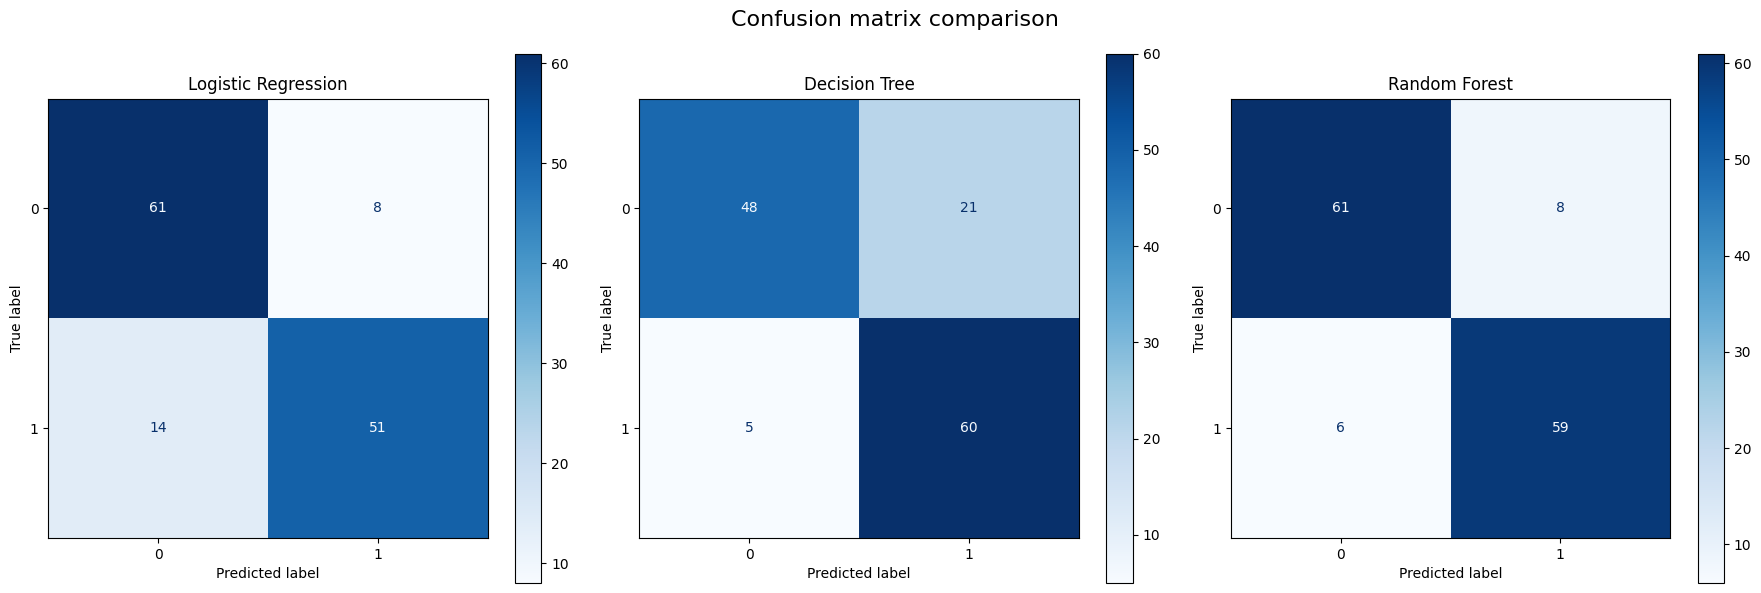

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confusion matrix comparison', fontsize=16)
#for logistic regression
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
#for Decision tree classifier
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')
#for Random forest classifier
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

The confusion matrix plot visualizes the true positive and true negative results from the machine learning models. We can see that the Random Forest Classifier has the highest true positive and true negative results combined, with less false positive and false negative results. In conclusion, the Random Forest Classifier is the best model for predicting Fraudulent warranty claims.

#### Classification report

In [43]:
from sklearn.metrics import classification_report
print('Logistic Classification Report: \n', classification_report(y_test, logreg_pred))
print('Decision Tree Classification Report: \n', classification_report(y_test, dtree_pred))
print('Random Forest Classification Report: \n', classification_report(y_test, rfc_pred))

Logistic Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        69
           1       0.86      0.78      0.82        65

    accuracy                           0.84       134
   macro avg       0.84      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79        69
           1       0.74      0.92      0.82        65

    accuracy                           0.81       134
   macro avg       0.82      0.81      0.80       134
weighted avg       0.83      0.81      0.80       134

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        69
           1       0.88      0.91      0.89        65

    accuracy                           0.90       134
   macro avg    

#### Model Metrics

Text(0.5, 1.0, 'Mean Squared Error')

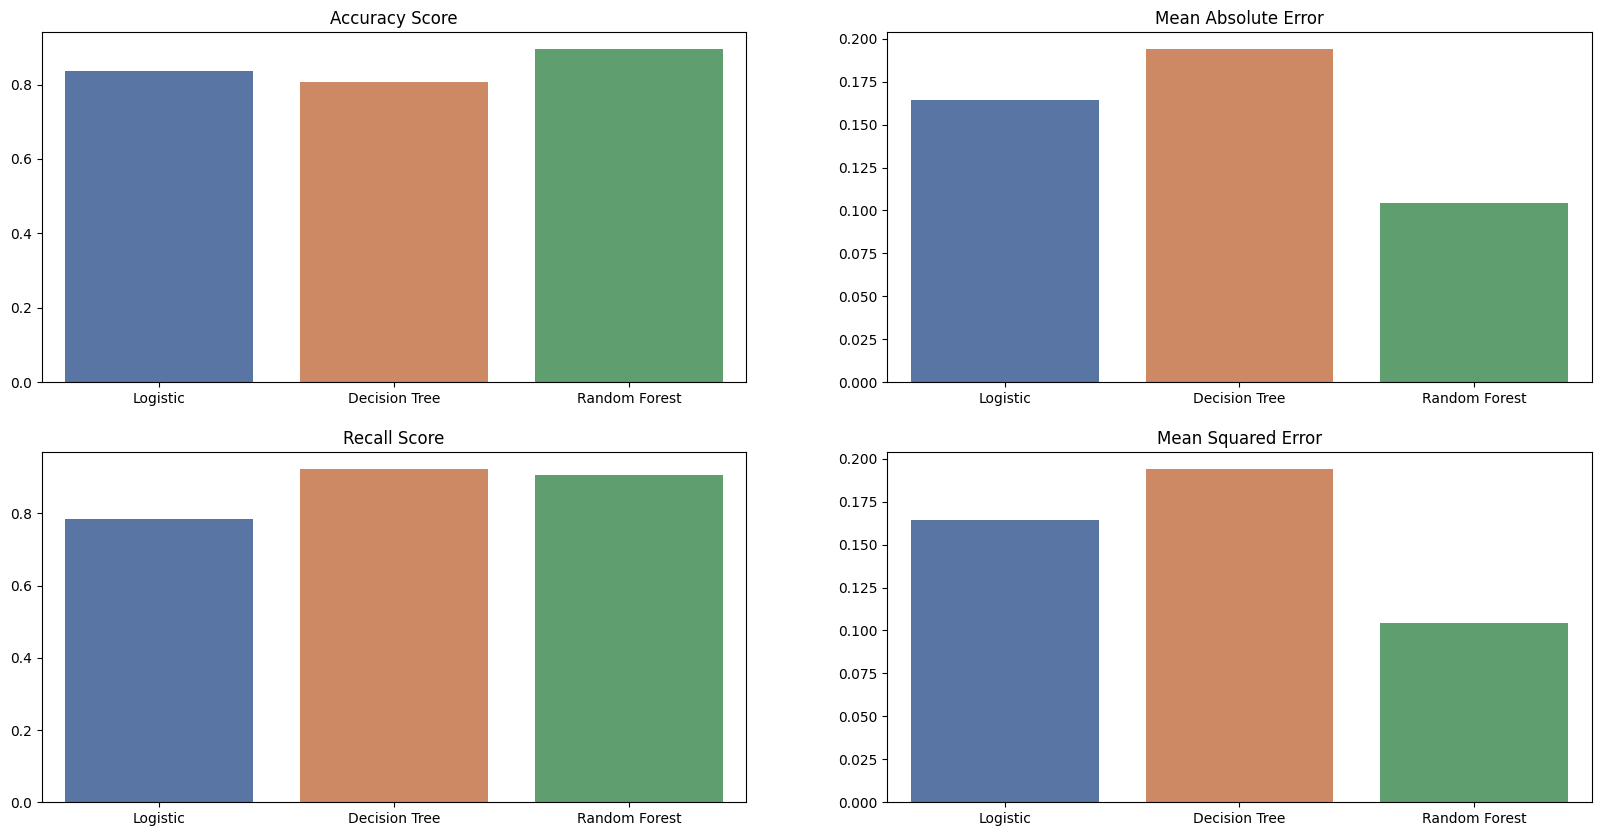

In [44]:
from sklearn.metrics import accuracy_score, recall_score, mean_absolute_error, mean_squared_error
#Bar plots
fig, ax = plt.subplots(2,2, figsize=(20, 10))
#Accuracy Score
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest' ], palette='deep', y = [accuracy_score(y_test, logreg_pred),accuracy_score(y_test, dtree_pred),accuracy_score(y_test, rfc_pred)],ax=ax[0, 0])
ax[0, 0].set_title('Accuracy Score') 
#Mean Absolute Error
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [mean_absolute_error(y_test, logreg_pred),mean_absolute_error(y_test, dtree_pred),mean_absolute_error(y_test, rfc_pred)],ax=ax[0, 1])
ax[0, 1].set_title('Mean Absolute Error')
#F1 Score
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [recall_score(y_test, logreg_pred),recall_score(y_test, dtree_pred),recall_score(y_test, rfc_pred)],ax=ax[1, 0])
ax[1, 0].set_title('Recall Score')
#Mean Squared Error
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [mean_squared_error(y_test, logreg_pred),mean_squared_error(y_test, dtree_pred),mean_squared_error(y_test, rfc_pred)],ax=ax[1, 1])
ax[1, 1].set_title('Mean Squared Error')

#### Feature Importance

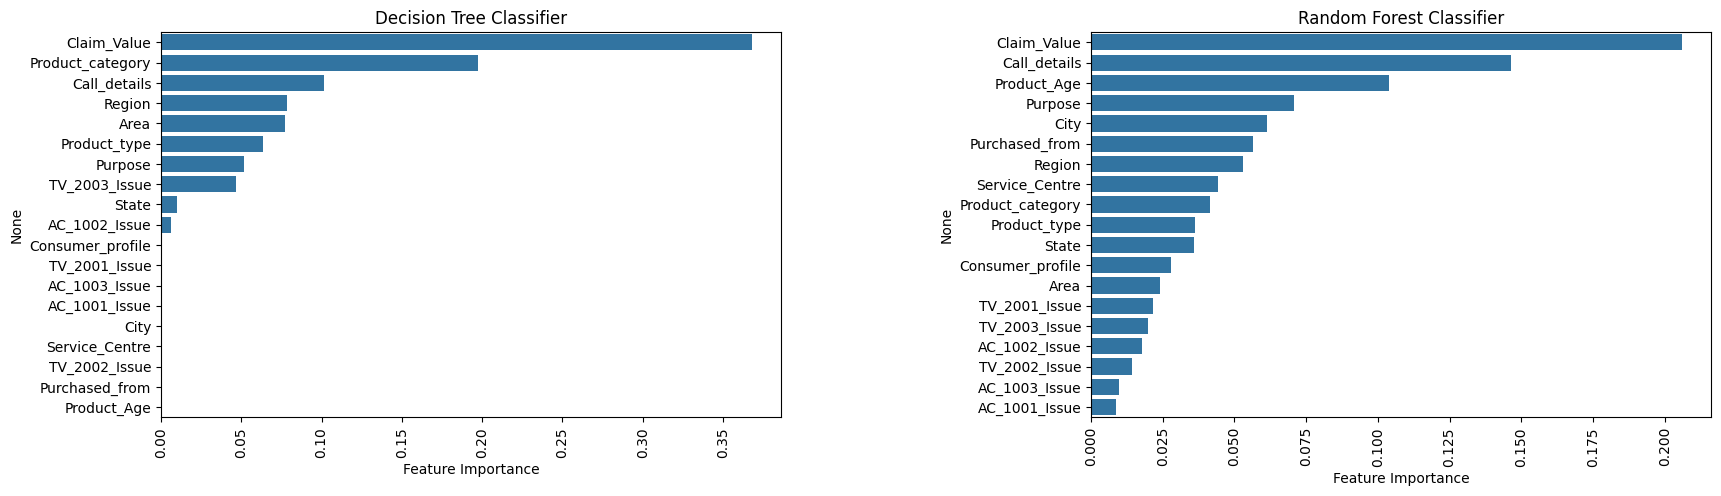

In [45]:
#feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_r = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(1,2,figsize=(20,5))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_d.index, x=feature_importance_d['Feature Importance'], ax=ax[0]).set_title('Decision Tree Classifier')
ax[0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_r.index, x=feature_importance_r['Feature Importance'], ax=ax[1]).set_title('Random Forest Classifier')
ax[1].xaxis.set_tick_params(rotation=90)

The graphs above indicate that claim value and call details are the most important features for predicting fraudulent warranty claims. Therefore, the company should focus on these features to reduce warranty claims fraud.

## Phase 7: Conclusion and Recommendation

#### Key Insights from the exploratory Analysis:
##### Geographical Trends: 
Most warranty claims, including fraudulent ones, are concentrated in Andhra Pradesh and Tamil Nadu, specifically in urban regions like Hyderabad and Chennai. This indicates a potential region-based pattern of fraud.

##### Product-based Patterns:

TV Claims: More personal-purpose purchases of TVs lead to higher warranty claims. Fraudulent claims occur both when there are actual issues with TV parts and when there are no issues, suggesting a complex fraud pattern.<br>
AC Claims: Fraudulent claims occur even when there are no issues with AC parts, making fraud easier to detect for AC products.<br>
Purchase Channel: Fraudulent claims are more frequent when purchases are made through manufacturers, indicating a higher risk associated with manufacturer-direct sales channels.

##### Claim Value: 
Fraudulent claims have higher claim values compared to genuine ones, suggesting that fraudsters may be attempting to exploit the warranty system for larger payouts.

##### Service Center Anomaly: 
Service center 13 has the highest number of fraudulent claims despite handling fewer total warranty claims. This could be a red flag for internal auditing or investigation.

##### Customer Call Duration: 
Fraudulent claims are associated with shorter customer care call durations (under 3 minutes), possibly indicating that fraudulent customers may be trying to rush through the process to avoid scrutiny.

## Recommendations:
* A Focus on High-Risk Regions: Implement stricter verification and monitoring processes for warranty claims originating from Andhra Pradesh and Tamil Nadu, especially in urban areas like Hyderabad and Chennai.

* Investigate Service Center 13:  As it has a disproportionately high number of fraudulent claims.

* Manufacturer Sales Monitoring: Strengthen fraud detection measures for claims associated with purchases made directly through manufacturers.

* Leverage Customer Call Duration: Use the observed correlation between call duration and fraud to flag suspicious claims. Claims with call durations of 3 minutes or under, could trigger additional verification steps.

* Regular Audits and Process Adjustments: Periodically review claim handling processes, particularly for high-value claims, and monitor for evolving fraud patterns.

#### Machine Learning Models:
Finally, for the machine learning models, I have used three models - Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. The Random Forest Classifier has the highest accuracy( 90%), F1 Score (89%), and the lowest mean squared error, and mean absolute error. <br>
Therefore, the Random Forest Classifier is a good fit for predicting fraudulent warranty claims and can be improved further by Increasing the size of the dataset, particularly adding more examples of fraudulent claims, would likely improve model recall and allow for better detection of fraud